In [44]:
import pandas as pd
import numpy as np
import os 
from ast import literal_eval
import matplotlib.pyplot as plt

In [17]:
df_data= pd.read_csv("Resource/IMDb_movies.csv", low_memory=False)
df_data

imdb_title_id                           title  \
0         tt0000009                      Miss Jerry   
1         tt0000574     The Story of the Kelly Gang   
2         tt0001892                  Den sorte drøm   
3         tt0002101                       Cleopatra   
4         tt0002130                       L'Inferno   
...             ...                             ...   
85850     tt9908390                         Le lion   
85851     tt9911196  De Beentjes van Sint-Hildegard   
85852     tt9911774       Padmavyuhathile Abhimanyu   
85853     tt9914286               Sokagin Çocuklari   
85854     tt9914942      La vida sense la Sara Amat   

                       original_title  year date_published  \
0                          Miss Jerry  1894     1894-10-09   
1         The Story of the Kelly Gang  1906     1906-12-26   
2                      Den sorte drøm  1911     1911-08-19   
3                           Cleopatra  1912     1912-11-13   
4                           L'Inferno  1911     1911-03-06   
...                               ...   ...            ...   
85850                         Le lion  2020     2020-01-29   
85851  De Beentjes van Sint-Hildegard  2020     2020-02-13   
85852       Padmavyuhathile Abhimanyu  2019     2019-03-08   
85853               Sokagin Çocuklari  2019     2019-03-15   
85854      La vida sense la Sara Amat  2019     2020-02-05   

                           genre  duration           country       language  \
0                        Romance        45               USA           None   
1        Biography, Crime, Drama        70         Australia           None   
2                          Drama        53  Germany, Denmark            NaN   
3                 Drama, History       100               USA        English   
4      Adventure, Drama, Fantasy        68             Italy        Italian   
...                          ...       ...               ...            ...   
85850                     Comedy        95   France, Belgium         French   
85851              Comedy, Drama       103       Netherlands  German, Dutch   
85852                      Drama       130             India      Malayalam   
85853              Drama, Family        98            Turkey        Turkish   
85854                      Drama        74             Spain        Catalan   

                                  director  ...  \
0                          Alexander Black  ...   
1                             Charles Tait  ...   
2                                Urban Gad  ...   
3                       Charles L. Gaskill  ...   
4      Francesco Bertolini, Adolfo Padovan  ...   
...                                    ...  ...   
85850               Ludovic Colbeau-Justin  ...   
85851                      Johan Nijenhuis  ...   
85852                      Vineesh Aaradya  ...   
85853                    Ahmet Faik Akinci  ...   
85854                            Laura Jou  ...   

                                                  actors  \
0      Blanche Bayliss, William Courtenay, Chauncey D...   
1      Elizabeth Tait, John Tait, Norman Campbell, Be...   
2      Asta Nielsen, Valdemar Psilander, Gunnar Helse...   
3      Helen Gardner, Pearl Sindelar, Miss Fielding, ...   
4      Salvatore Papa, Arturo Pirovano, Giuseppe de L...   
...                                                  ...   
85850  Dany Boon, Philippe Katerine, Anne Serra, Samu...   
85851  Herman Finkers, Johanna ter Steege, Leonie ter...   
85852  Anoop Chandran, Indrans, Sona Nair, Simon Brit...   
85853  Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...   
85854  Maria Morera Colomer, Biel Rossell Pelfort, Is...   

                                             description avg_vote votes  \
0      The adventures of a female reporter in the 1890s.      5.9   154   
1      True story of notorious Australian outlaw Ned ...      6.1   589   
2      Two men of high rank are both wooing the beaut...      5.8   188   
3      The fabled

In [18]:
movies_cols= ["title","year","genre","country","language","usa_gross_income","worlwide_gross_income"]
df_movies= df_data[movies_cols].copy()
df_movies.head()

title  year                      genre  \
0                   Miss Jerry  1894                    Romance   
1  The Story of the Kelly Gang  1906    Biography, Crime, Drama   
2               Den sorte drøm  1911                      Drama   
3                    Cleopatra  1912             Drama, History   
4                    L'Inferno  1911  Adventure, Drama, Fantasy   

            country language usa_gross_income worlwide_gross_income  
0               USA     None              NaN                   NaN  
1         Australia     None              NaN                   NaN  
2  Germany, Denmark      NaN              NaN                   NaN  
3               USA  English              NaN                   NaN  
4             Italy  Italian              NaN                   NaN

In [19]:
renamed={"usa_gross_income":"usaGrossIncome","worlwide_gross_income": "worldGrossIncome"}
df_movies=df_movies.rename(columns=renamed)
df_movies

title  year                      genre  \
0                          Miss Jerry  1894                    Romance   
1         The Story of the Kelly Gang  1906    Biography, Crime, Drama   
2                      Den sorte drøm  1911                      Drama   
3                           Cleopatra  1912             Drama, History   
4                           L'Inferno  1911  Adventure, Drama, Fantasy   
...                               ...   ...                        ...   
85850                         Le lion  2020                     Comedy   
85851  De Beentjes van Sint-Hildegard  2020              Comedy, Drama   
85852       Padmavyuhathile Abhimanyu  2019                      Drama   
85853               Sokagin Çocuklari  2019              Drama, Family   
85854      La vida sense la Sara Amat  2019                      Drama   

                country       language usaGrossIncome worldGrossIncome  
0                   USA           None            NaN              NaN  
1             Australia           None            NaN              NaN  
2      Germany, Denmark            NaN            NaN              NaN  
3                   USA        English            NaN              NaN  
4                 Italy        Italian            NaN              NaN  
...                 ...            ...            ...              ...  
85850   France, Belgium         French            NaN        $ 3507171  
85851       Netherlands  German, Dutch            NaN        $ 7299062  
85852             India      Malayalam            NaN              NaN  
85853            Turkey        Turkish            NaN           $ 2833  
85854             Spain        Catalan            NaN          $ 59794  

[85855 rows x 7 columns]

In [20]:
df_movies.dtypes

title               object
year                object
genre               object
country             object
language            object
usaGrossIncome      object
worldGrossIncome    object
dtype: object

In [37]:
df_movies["usaGrossIncome"]=pd.to_numeric(df_movies["usaGrossIncome"].replace([np.inf,-np.inf], np.nan).dropna(), downcast="integer", errors="coerce")
df_movies["worldGrossIncome"]=pd.to_numeric(df_movies["worldGrossIncome"].replace([np.inf,-np.inf], np.nan).dropna(), downcast="integer", errors="coerce")

In [38]:
df_movies.dtypes

title                       object
year                datetime64[ns]
genre                       object
country                     object
language                    object
usaGrossIncome             float64
worldGrossIncome           float64
dtype: object

In [39]:
df_movies

title       year                      genre  \
0                          Miss Jerry 1894-01-01                    Romance   
1         The Story of the Kelly Gang 1906-01-01    Biography, Crime, Drama   
2                      Den sorte drøm 1911-01-01                      Drama   
3                           Cleopatra 1912-01-01             Drama, History   
4                           L'Inferno 1911-01-01  Adventure, Drama, Fantasy   
...                               ...        ...                        ...   
85850                         Le lion 2020-01-01                     Comedy   
85851  De Beentjes van Sint-Hildegard 2020-01-01              Comedy, Drama   
85852       Padmavyuhathile Abhimanyu 2019-01-01                      Drama   
85853               Sokagin Çocuklari 2019-01-01              Drama, Family   
85854      La vida sense la Sara Amat 2019-01-01                      Drama   

                country       language  usaGrossIncome  worldGrossIncome  
0                   USA           None             NaN               NaN  
1             Australia           None             NaN               NaN  
2      Germany, Denmark            NaN             NaN               NaN  
3                   USA        English             NaN               NaN  
4                 Italy        Italian             NaN               NaN  
...                 ...            ...             ...               ...  
85850   France, Belgium         French             NaN               NaN  
85851       Netherlands  German, Dutch             NaN               NaN  
85852             India      Malayalam             NaN               NaN  
85853            Turkey        Turkish             NaN               NaN  
85854             Spain        Catalan             NaN               NaN  

[85855 rows x 7 columns]

In [42]:
df_movies["usaGrossIncome"]=df_movies["usaGrossIncome"].fillna(0)
df_movies["worldGrossIncome"]=df_movies["worldGrossIncome"].fillna(0)
df_movies["language"]=df_movies["language"].fillna("None")
df_movies

title       year                      genre  \
0                          Miss Jerry 1894-01-01                    Romance   
1         The Story of the Kelly Gang 1906-01-01    Biography, Crime, Drama   
2                      Den sorte drøm 1911-01-01                      Drama   
3                           Cleopatra 1912-01-01             Drama, History   
4                           L'Inferno 1911-01-01  Adventure, Drama, Fantasy   
...                               ...        ...                        ...   
85850                         Le lion 2020-01-01                     Comedy   
85851  De Beentjes van Sint-Hildegard 2020-01-01              Comedy, Drama   
85852       Padmavyuhathile Abhimanyu 2019-01-01                      Drama   
85853               Sokagin Çocuklari 2019-01-01              Drama, Family   
85854      La vida sense la Sara Amat 2019-01-01                      Drama   

                country       language  usaGrossIncome  worldGrossIncome  
0                   USA           None             0.0               0.0  
1             Australia           None             0.0               0.0  
2      Germany, Denmark           None             0.0               0.0  
3                   USA        English             0.0               0.0  
4                 Italy        Italian             0.0               0.0  
...                 ...            ...             ...               ...  
85850   France, Belgium         French             0.0               0.0  
85851       Netherlands  German, Dutch             0.0               0.0  
85852             India      Malayalam             0.0               0.0  
85853            Turkey        Turkish             0.0               0.0  
85854             Spain        Catalan             0.0               0.0  

[85855 rows x 7 columns]

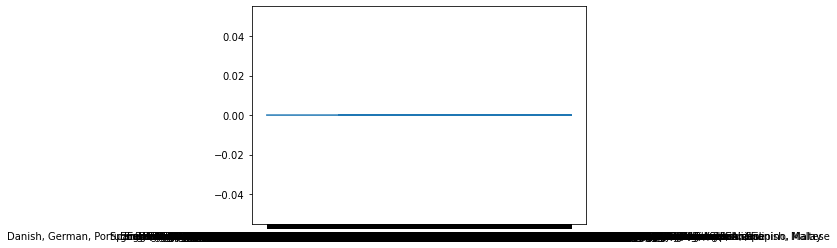

In [45]:
x=df_movies["language"]
y=df_movies["worldGrossIncome"]
plt.plot(x,y)